In [233]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Make Data
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

#Pre-Processing
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Clustering Algos
# k-means,Mean-Shift, Spectral, Affinity
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth,SpectralClustering,AffinityPropagation

#Metrics
from sklearn import metrics

#import cycle
from itertools import cycle

In [234]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv")
df = pd.read_csv(data_path)

In [235]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [237]:
df.describe()

,age,division,official,overall,pace,genderdiv
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000
mean,41.638332,1100.967025,208.159470,8429.373422,7.947398,4351.684732
std,10.351311,942.114816,23.743608,5052.024116,0.905739,2772.398239
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,363.000000,191.727500,4061.750000,7.320000,2032.750000
50%,42.000000,842.000000,209.225000,8247.500000,7.980000,4113.500000
75%,49.000000,1560.000000,225.230000,12662.250000,8.600000,6316.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


In [238]:
df.drop(('ctz'), axis =1, inplace=True)
df.drop(('name'), axis =1, inplace=True)
df.drop(('bib'), axis =1, inplace=True)

In [239]:
# Re-Order Columns
df = df.reindex(['5k','10k','20k','half', '25k', '30k','35k','40k', 'official', 'pace','division','overall','genderdiv','gender','age','country', 'city'],axis=1)

df.head()

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,division,overall,genderdiv,gender,age,country,city
0,8.90,18.18,38.80,40.93,49.87,62.07,74.73,85.55,90.90,3.47,9,9,9,M,28,CAN,Toronto
1,15.90,30.90,61.52,64.90,77.27,92.97,108.78,124.77,132.50,5.07,5,5,5,M,30,KEN,Kenya
2,15.93,30.90,61.53,64.92,77.23,92.72,108.68,123.78,130.37,4.98,1,1,1,M,23,ETH,Ambo
3,8.98,18.73,39.88,42.00,50.50,61.35,73.00,83.43,88.43,3.38,5,5,5,M,32,AUS,Hamilton
4,8.92,18.18,38.55,40.57,48.75,59.92,71.68,81.88,87.22,3.33,3,3,3,M,39,JPN,Iizuka


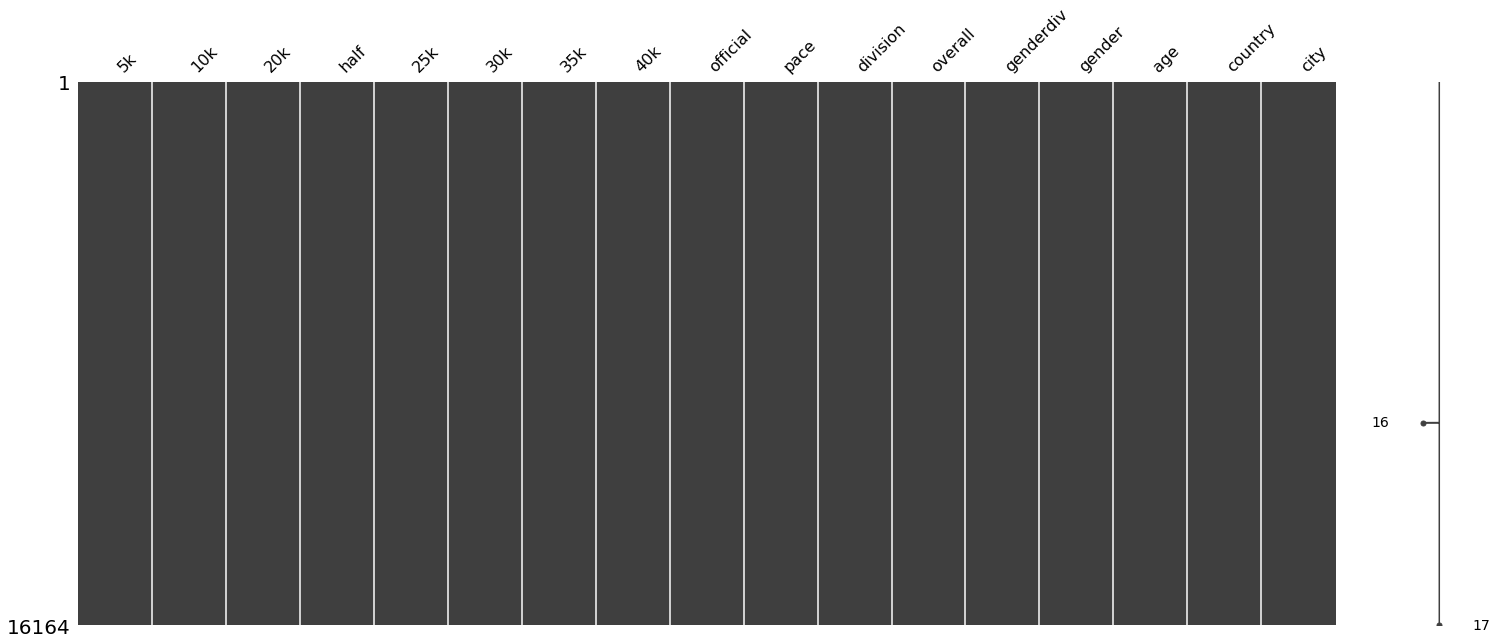

In [240]:
import missingno as msno
#missing values
df.isnull().sum()*100/df.isnull().count()

# Create nullity matrix for missing values 

msno.matrix(df)

In [241]:
df.isnull().sum()*100/df.isnull().count()

5k           0.000000
10k          0.000000
20k          0.000000
half         0.000000
25k          0.000000
30k          0.000000
35k          0.000000
40k          0.000000
official     0.000000
pace         0.000000
division     0.000000
overall      0.000000
genderdiv    0.000000
gender       0.000000
age          0.000000
country      0.000000
city         0.006187
dtype: float64

In [242]:
#df.state.fillna(('other'),inplace=True) 

In [243]:
df.isnull().sum()*100/df.isnull().count()

5k           0.000000
10k          0.000000
20k          0.000000
half         0.000000
25k          0.000000
30k          0.000000
35k          0.000000
40k          0.000000
official     0.000000
pace         0.000000
division     0.000000
overall      0.000000
genderdiv    0.000000
gender       0.000000
age          0.000000
country      0.000000
city         0.006187
dtype: float64

In [244]:
df[df.isnull().any(axis=1)]

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,division,overall,genderdiv,gender,age,country,city
10138,24.15,48.23,97.05,102.47,122.20,149.82,179.77,208.93,222.58,8.5,1152,11978,8194,M,51,ARG,NaN


In [245]:
df['city'] = df['city'].apply(lambda x: 'Buenos Aires'if pd.isnull(x) else x)

In [260]:
df.isnull().sum()*100/df.isnull().count()

5k           0.408315
10k          0.160851
20k          0.105172
half         0.098985
25k          0.142292
30k          0.105172
35k          0.129918
40k          0.105172
official     0.000000
pace         0.000000
division     0.000000
overall      0.000000
genderdiv    0.000000
gender       0.000000
age          0.000000
country      0.000000
city         0.000000
dtype: float64

## Data Encoding

In [248]:
df.head()

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,division,overall,genderdiv,gender,age,country,city
0,8.90,18.18,38.80,40.93,49.87,62.07,74.73,85.55,90.90,3.47,9,9,9,M,28,CAN,Toronto
1,15.90,30.90,61.52,64.90,77.27,92.97,108.78,124.77,132.50,5.07,5,5,5,M,30,KEN,Kenya
2,15.93,30.90,61.53,64.92,77.23,92.72,108.68,123.78,130.37,4.98,1,1,1,M,23,ETH,Ambo
3,8.98,18.73,39.88,42.00,50.50,61.35,73.00,83.43,88.43,3.38,5,5,5,M,32,AUS,Hamilton
4,8.92,18.18,38.55,40.57,48.75,59.92,71.68,81.88,87.22,3.33,3,3,3,M,39,JPN,Iizuka


In [249]:
list_to_numerical = ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k']
list_to_categorical = ['gender', 'country', 'city']

In [250]:
for i in list_to_numerical:
    df[i] = pd.to_numeric(df[i], errors='coerce')

for n in list_to_categorical:
    
#First, change the type of the column:
    df[n] = pd.Categorical(df[n])
#Now the data look similar but are stored categorically. To capture the category codes:
    df[n] = df[n].cat.codes

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16164 entries, 0 to 16163
Data columns (total 17 columns):
5k           16098 non-null float64
10k          16138 non-null float64
20k          16147 non-null float64
half         16148 non-null float64
25k          16141 non-null float64
30k          16147 non-null float64
35k          16143 non-null float64
40k          16147 non-null float64
official     16164 non-null float64
pace         16164 non-null float64
division     16164 non-null int64
overall      16164 non-null int64
genderdiv    16164 non-null int64
gender       16164 non-null int8
age          16164 non-null int64
country      16164 non-null int8
city         16164 non-null int16
dtypes: float64(10), int16(1), int64(4), int8(2)
memory usage: 1.9 MB


In [269]:
np.nan_to_num(df)
df.dropna(inplace=True)

# Cluster Methods

In [262]:
df = df.dropna()
df_normalize = StandardScaler().fit_transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [280]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

5k           True
10k          True
20k          True
half         True
25k          True
30k          True
35k          True
40k          True
official     True
pace         True
division     True
overall      True
genderdiv    True
gender       True
age          True
country      True
city         True
dtype: bool

In [281]:
# Define the features and the outcome.
X = df_normalize
Y = df['official']

## K-Means

In [266]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

For n_clusters=2, The Silhouette Coefficient is 0.3633611065296327


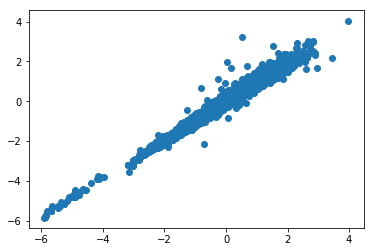

For n_clusters=3, The Silhouette Coefficient is 0.24929168765298512


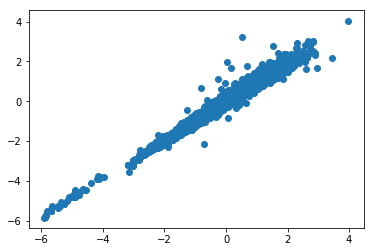

For n_clusters=4, The Silhouette Coefficient is 0.25363739990221135


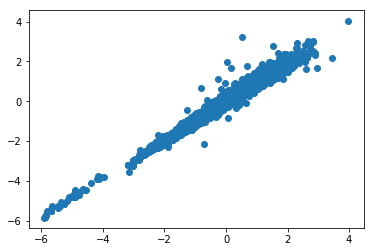

For n_clusters=5, The Silhouette Coefficient is 0.22707905276505042


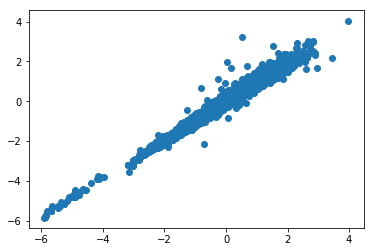

For n_clusters=6, The Silhouette Coefficient is 0.23344069586884272


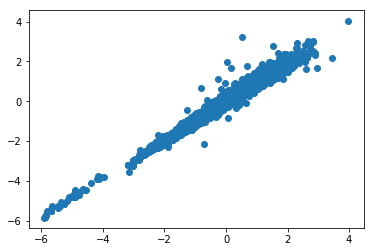

In [290]:
for n_cluster in range(2, 7):
    y_pred = KMeans(n_clusters=n_cluster).fit(df_normalize)
    label = y_pred.labels_
    sil_coeff = silhouette_score(df_normalize, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

## Mean-shift

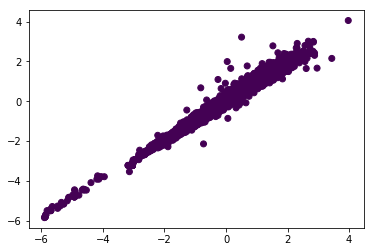

Number of estimated clusters: 1
For n_clusters=6, The Silhouette Coefficient is 0.23344069586884272


In [291]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()
print("Number of estimated clusters: {}".format(n_clusters_))

sil_coeff = silhouette_score(df_normalize, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


## Spectral clustering

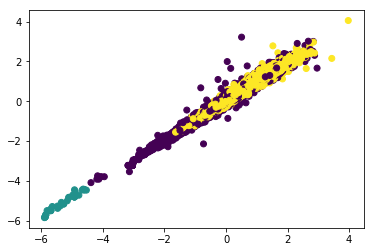

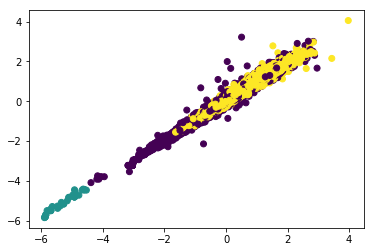

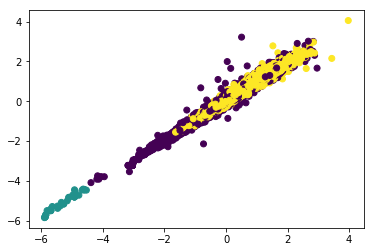

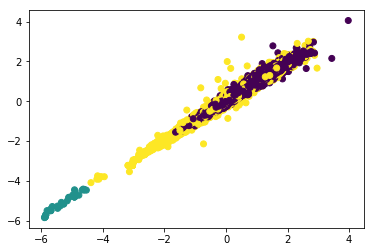

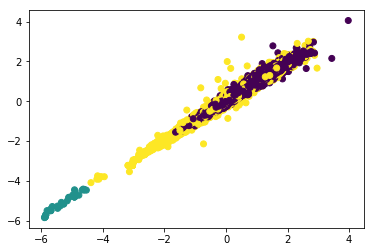

In [292]:
for n_cluster in range(2, 7):

# Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X)

#Predicted clusters.
    predict=sc.fit_predict(X)
    sil_coeff = silhouette_score(X, predict, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
#Graph results.
    plt.scatter(X[:, 0], X[:, 1], c=predict)
    plt.show()
    


## Affinity propagation

In [293]:
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
sil_coeff = silhouette_score(X, labels, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Done
Estimated number of clusters: 287
For n_clusters=6, The Silhouette Coefficient is 0.16293741396871925


In [ ]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()